### Install Required Packages

In [1]:
! pip install numpy pandas scikit-learn matplotlib

### Imports

In [2]:
import swifter
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

### Read data

In [3]:
train_df = pd.read_csv('../assist_material/datasets/extracted/q1/train.csv', sep=',')
train_df.columns = ['id', 'title', 'content', 'label']

### Benchmark Models

For the benchmarking we use the following combinations. SVM with TF-IDF, Random Forest with TF-IDF & SVM with SVD,
Random Forest with SVD. As Bag-of-words I used TF-IDF variation in order to vectorize the datasets.


In [4]:
vectorizer = TfidfVectorizer(max_features=50000)
svd = TruncatedSVD(n_components=300)

svm = SVC(kernel='linear')
random_forest = RandomForestClassifier(n_estimators=1000, max_features='sqrt', n_jobs=-1)
svm_tfidf = make_pipeline(vectorizer,svm)
random_forest_tfidf = make_pipeline(vectorizer, random_forest)

svm_tfidf_svd = make_pipeline(vectorizer, svd, svm)
random_forest_tfidf_svd = make_pipeline(vectorizer, svd, random_forest)


### Initialize data with labels in order to seed the classifiers

In [5]:
X = train_df['title'] + ' ' + train_df['content']
y = train_df['label']

### SVM with TF-IDF

In [6]:
scores_svm_tfidf = cross_validate(svm_tfidf, X, y,
                        scoring=['accuracy', 'precision_macro', 'recall_macro', 'f1_macro'],
                        cv=5,
                        n_jobs=-1,
                        return_train_score=False)
print('SVM + tfidf', scores_svm_tfidf)

SVM + tfidf {'fit_time': array([4983.50711012, 4987.29381394, 5302.57247901, 5024.12881422,
       4947.53324771]), 'score_time': array([646.85783744, 642.27338457, 579.83448076, 636.89296818,
       643.03198361]), 'test_accuracy': array([0.97486471, 0.97338879, 0.97151035, 0.97240485, 0.97374659]), 'test_precision_macro': array([0.97357825, 0.97247721, 0.96960123, 0.97128056, 0.97284079]), 'test_recall_macro': array([0.97166132, 0.96938016, 0.96834565, 0.96866393, 0.96976865]), 'test_f1_macro': array([0.97260122, 0.97090321, 0.96896362, 0.96994996, 0.97128082])}


### Random Forest with TF-IDF

In [7]:
scores_random_forest_tfidf = cross_validate(random_forest_tfidf, X, y,
                        scoring=['accuracy', 'precision_macro', 'recall_macro', 'f1_macro'],
                        cv=5,
                        return_train_score=False)
print('Random Forest + tfidf', scores_random_forest_tfidf)

Random Forest + tfidf {'fit_time': array([1027.23066688, 1029.48917365, 1017.44397116, 1033.8934586 ,
       1031.32706952]), 'score_time': array([14.66637087, 14.63790417, 14.61870193, 14.71222162, 14.64782643]), 'test_accuracy': array([0.93228677, 0.92866407, 0.9279932 , 0.93009526, 0.92973747]), 'test_precision_macro': array([0.93663272, 0.93266931, 0.93237597, 0.93382178, 0.93462345]), 'test_recall_macro': array([0.91663908, 0.91110772, 0.9135436 , 0.91301569, 0.91132015]), 'test_f1_macro': array([0.92589242, 0.92101799, 0.92231484, 0.92259073, 0.92196075])}


### SVM with SVD

In [8]:
scores_svm_tfidf_svd = cross_validate(svm_tfidf_svd, X, y,
                        scoring=['accuracy', 'precision_macro', 'recall_macro', 'f1_macro'],
                        cv=5,
                        n_jobs=-1,
                        return_train_score=False)
print('SVM + tfidf + SVD', scores_svm_tfidf_svd)

SVM + tfidf + SVD {'fit_time': array([1779.34122729, 1772.9892509 , 1772.69490957, 1769.12824607,
       1753.28966212]), 'score_time': array([263.92417932, 263.56710649, 264.10922265, 260.85023665,
       263.24279857]), 'test_accuracy': array([0.94163424, 0.94145534, 0.93787736, 0.93984525, 0.94217094]), 'test_precision_macro': array([0.93777937, 0.93986959, 0.93372428, 0.93632185, 0.93943891]), 'test_recall_macro': array([0.93113372, 0.92895242, 0.92922922, 0.92900089, 0.92975108]), 'test_f1_macro': array([0.93436706, 0.93417158, 0.93143686, 0.93255392, 0.93439795])}


### Random Forest with SVD

In [9]:
scores_random_forest_tfidf_svd = cross_validate(random_forest_tfidf_svd, X, y,
                        scoring=['accuracy', 'precision_macro', 'recall_macro', 'f1_macro'],
                        cv=5,
                        return_train_score=False)
print('Random Forest + tfidf + SVD', scores_random_forest_tfidf_svd)

Random Forest + tfidf + SVD {'fit_time': array([607.92321777, 595.0351193 , 601.09629822, 599.17084241,
       598.66447616]), 'score_time': array([10.1774559 , 10.13576484,  9.86275768, 10.07177615, 10.02102184]), 'test_accuracy': array([0.94865602, 0.94816405, 0.94489915, 0.94722483, 0.94659869]), 'test_precision_macro': array([0.94951215, 0.95151435, 0.94623685, 0.9483248 , 0.94961739]), 'test_recall_macro': array([0.93592411, 0.93329237, 0.93222891, 0.93370688, 0.93047253]), 'test_f1_macro': array([0.94237093, 0.941788  , 0.93886951, 0.94058922, 0.93935297])}


## Beat the Benchmark classifier

In order to achieve the best performance in terms of accuracy and execution time the best choice is Random Forest with
SVD. Tuning this model further we can achieve 96% accuracy. The hyper-parameters below are occurred through the
tuning phase which was a time-consuming process, approximately 20 different combinations were executed. Also, some
information about the preprocessing. The input text initially gets cleaned up from stopwords, turned to lower case
and finally vectorized to TF-IDF.

In [10]:
# Preprocess

# Give a small gain to titles
X = (train_df['title'] + ' ') * 3 + train_df['content']

stop_words = ENGLISH_STOP_WORDS.union(['will', 's', 't', 'one', 'new', 'said', 'say', 'says', 'year'])

vectorizer_tuned = TfidfVectorizer(lowercase=True, stop_words=stop_words, ngram_range=(1,1), max_features=50000)
svd_tuned = TruncatedSVD(n_components=1000)

random_forest_tuned = RandomForestClassifier(n_estimators=1000, max_features='sqrt', n_jobs=-1)

random_forest_tfidf_svd_tuned = make_pipeline(vectorizer_tuned, svd_tuned, random_forest_tuned)

scores_random_forest_tfidf_svd_tuned = cross_validate(random_forest_tfidf_svd_tuned, X, y,
                        scoring=['accuracy', 'precision_macro', 'recall_macro', 'f1_macro'],
                        cv=5,
                        return_train_score=False)
print('Random Forest + tfidf + SVD', scores_random_forest_tfidf_svd_tuned)

Random Forest + tfidf + SVD {'fit_time': array([1297.75528431, 1296.63180065, 1298.92468619, 1286.59034038,
       1294.77554822]), 'score_time': array([12.3066082 , 12.33018041, 12.21271563, 12.38780785, 12.33839941]), 'test_accuracy': array([0.96086587, 0.96126839, 0.95840601, 0.96104477, 0.96126839]), 'test_precision_macro': array([0.960228  , 0.96200845, 0.95731363, 0.96089662, 0.96199434]), 'test_recall_macro': array([0.95250394, 0.95131722, 0.95076747, 0.9520458 , 0.95122101]), 'test_f1_macro': array([0.95624868, 0.9564376 , 0.95394746, 0.95628501, 0.95637428])}


### Generating stats table

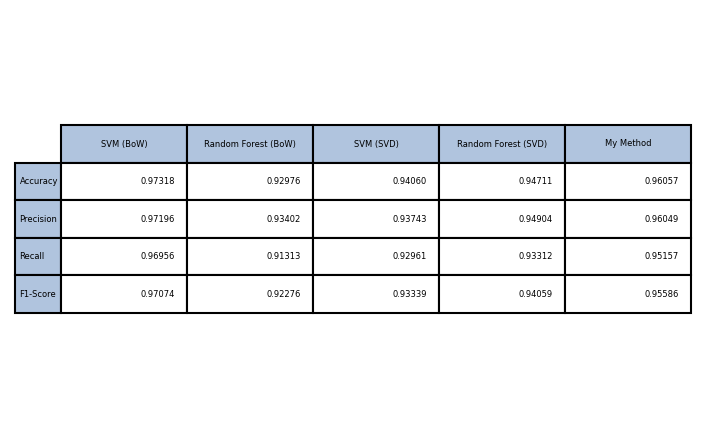

In [11]:
data_table = [[np.mean(scores_svm_tfidf['test_accuracy'], dtype='float64'),
               np.mean(scores_random_forest_tfidf['test_accuracy'], dtype='float64'),
               np.mean(scores_svm_tfidf_svd['test_accuracy'], dtype='float64'),
               np.mean(scores_random_forest_tfidf_svd['test_accuracy'], dtype='float64'),
               np.mean(scores_random_forest_tfidf_svd_tuned['test_accuracy'], dtype='float64')],
              [np.mean(scores_svm_tfidf['test_precision_macro'], dtype='float64'),
               np.mean(scores_random_forest_tfidf['test_precision_macro'], dtype='float64'),
               np.mean(scores_svm_tfidf_svd['test_precision_macro'], dtype='float64'),
               np.mean(scores_random_forest_tfidf_svd['test_precision_macro'], dtype='float64'),
               np.mean(scores_random_forest_tfidf_svd_tuned['test_precision_macro'], dtype='float64')],
              [np.mean(scores_svm_tfidf['test_recall_macro'], dtype='float64'),
               np.mean(scores_random_forest_tfidf['test_recall_macro'], dtype='float64'),
               np.mean(scores_svm_tfidf_svd['test_recall_macro'], dtype='float64'),
               np.mean(scores_random_forest_tfidf_svd['test_recall_macro'], dtype='float64'),
               np.mean(scores_random_forest_tfidf_svd_tuned['test_recall_macro'], dtype='float64')],
              [np.mean(scores_svm_tfidf['test_f1_macro'], dtype='float64'),
               np.mean(scores_random_forest_tfidf['test_f1_macro'], dtype='float64'),
               np.mean(scores_svm_tfidf_svd['test_f1_macro'], dtype='float64'),
               np.mean(scores_random_forest_tfidf_svd['test_f1_macro'], dtype='float64'),
               np.mean(scores_random_forest_tfidf_svd_tuned['test_f1_macro'], dtype='float64')]
              ]

cell_text = []
for row in data_table:
    cell_text.append([f'{x:1.5f}' for x in row])

plt.figure(dpi=150)
ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.box(on=None)
plt.subplots_adjust(left=0.2, bottom=0.2)

the_table = plt.table(cellText=cell_text,
                      rowLabels=['Accuracy', 'Precision', 'Recall', 'F1-Score'],
                      colLabels=['SVM (BoW)', 'Random Forest (BoW)', 'SVM (SVD)', 'Random Forest (SVD)', 'My Method'],
                      colColours=['lightsteelblue'] * 5,
                      rowColours=['lightsteelblue'] * 4,
                      loc='center')
the_table.scale(1, 1.5)
fig = plt.gcf()
plt.show()